**Specifying the Question**

The objective is to determine which team will win based on who is home or away and on whether the game was friendly or not

**Success Metrics**

Building an accurate model that predicts the outcome of games.The model making process should avoid underfitting or overfitting

**Context**

Mchezopesa Ltd needs to understand the outcome of the games in any match, considering past data.

**Experimental Design**

To successfully attain a good outcome,I shall explore the data understanding,preparation,modelling and evaluation

**Importing Libraries**

In [1]:
#Import the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [2]:
# upload dataset
df =pd.read_csv("fifa_ranking.csv",parse_dates = ['rank_date'])
df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


**Checking the FIFA dataset**

In [3]:
#View number of rows and columns in the dataset respectively
df.shape

(57793, 16)

In [4]:
#check column data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int64         
 1   country_full             57793 non-null  object        
 2   country_abrv             57793 non-null  object        
 3   total_points             57793 non-null  float64       
 4   previous_points          57793 non-null  int64         
 5   rank_change              57793 non-null  int64         
 6   cur_year_avg             57793 non-null  float64       
 7   cur_year_avg_weighted    57793 non-null  float64       
 8   last_year_avg            57793 non-null  float64       
 9   last_year_avg_weighted   57793 non-null  float64       
 10  two_year_ago_avg         57793 non-null  float64       
 11  two_year_ago_weighted    57793 non-null  float64       
 12  three_year_ago_avg       57793 n

In [5]:
#Understanding every column
df.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


**Checking the Results dataset**

In [6]:
df1 = pd.read_csv("results.csv",parse_dates = ['date']) 
df1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
#View number of rows and columns respectively
df.shape

(57793, 16)

In [8]:
#Datatypes of every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int64         
 1   country_full             57793 non-null  object        
 2   country_abrv             57793 non-null  object        
 3   total_points             57793 non-null  float64       
 4   previous_points          57793 non-null  int64         
 5   rank_change              57793 non-null  int64         
 6   cur_year_avg             57793 non-null  float64       
 7   cur_year_avg_weighted    57793 non-null  float64       
 8   last_year_avg            57793 non-null  float64       
 9   last_year_avg_weighted   57793 non-null  float64       
 10  two_year_ago_avg         57793 non-null  float64       
 11  two_year_ago_weighted    57793 non-null  float64       
 12  three_year_ago_avg       57793 n

In [9]:
#
df.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


**Converting the rank_date and date in Year and Month**

In [10]:
#creating a function that splits the year,month and day
from dateutil import parser
def year_month(df, column):
    df["year"] = df[column].apply(lambda x: x.year)
    df["month"] = df[column].apply(lambda x: x.month)

In [11]:
#Passing the column and the dataframe in the function.
year_month(df, 'rank_date')
df.head()
#The new columns are used to merge the datasets for consistency

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8


In [12]:
#Passing the column and the dataframe in the function.
year_month(df1, 'date')
df1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3


**Merging Datasets**

In [13]:
#merging to get the home rank 
fifa_home = pd.merge(df,df1, how='inner', left_on=['country_full','year','month'], right_on = ['home_team','year', 'month'] )
fifa_home.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,month,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,...,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False
1,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,...,8,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,Solna,Sweden,False
2,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,...,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Buenos Aires,Argentina,False
3,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,...,8,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False
4,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,...,8,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False


In [14]:
#Rename rank to home_rank
fifa_home.rename({'rank' : 'home_rank'}, axis = 1, inplace = True)
fifa_home.head()

,home_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,month,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,...,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False
1,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,...,8,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,Solna,Sweden,False
2,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,...,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Buenos Aires,Argentina,False
3,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,...,8,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False
4,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,...,8,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False


I renamed the column rank to home rank to avoid confusion.

I dropped features that I do not need at all for the model building.

In [15]:
final_home = fifa_home.drop([ 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'date', 
       'city', 'country', 'neutral','away_score'],axis=1)
final_home.head()

,home_rank,year,month,home_team,away_team,home_score,tournament
0,4,1993,8,Sweden,Switzerland,1,Friendly
1,4,1993,8,Sweden,France,1,FIFA World Cup qualification
2,5,1993,8,Argentina,Peru,2,FIFA World Cup qualification
3,5,1993,8,Argentina,Paraguay,0,FIFA World Cup qualification
4,8,1993,8,Brazil,Mexico,1,Friendly


In [16]:
#Merging away team to get the away rank
fifa_away= pd.merge(df,df1, how='inner', left_on=['country_full','year','month'], right_on = ['away_team','year', 'month'] )
fifa_away.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,month,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,...,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False
1,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,...,8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False
2,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,...,8,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False
3,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,...,8,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False
4,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,...,8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False


In [17]:
#Renaming rank to away_rank
fifa_away.rename({'rank' : 'away_rank'}, axis = 1, inplace = True)
fifa_away.head()

,away_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,month,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,...,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False
1,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,...,8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False
2,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,...,8,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False
3,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,...,8,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False
4,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,...,8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False


In [18]:
#Dropping unnecessary columns
final_away = fifa_away.drop([ 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'date',
       'tournament', 'city', 'country', 'neutral','home_team','home_score'] ,axis=1)
final_away.head()

,away_rank,year,month,away_team,away_score
0,3,1993,8,Switzerland,2
1,5,1993,8,Argentina,1
2,5,1993,8,Argentina,3
3,5,1993,8,Argentina,1
4,8,1993,8,Brazil,5


In [19]:
#merging the two datasets to give us a complete dataset 
final_final = pd.merge(final_home, final_away, how = 'inner', left_on = ['year', 'month', 'away_team'], right_on = ['year', 'month', 'away_team'])

final_final.head(10)

,home_rank,year,month,home_team,away_team,home_score,tournament,away_rank,away_score
0,4,1993,8,Sweden,Switzerland,1,Friendly,3,2
1,4,1993,8,Sweden,France,1,FIFA World Cup qualification,12,1
2,5,1993,8,Argentina,Peru,2,FIFA World Cup qualification,70,1
3,5,1993,8,Argentina,Peru,2,FIFA World Cup qualification,70,1
4,5,1993,8,Argentina,Peru,2,FIFA World Cup qualification,70,0
5,19,1993,8,Colombia,Peru,4,FIFA World Cup qualification,70,1
6,19,1993,8,Colombia,Peru,4,FIFA World Cup qualification,70,1
7,19,1993,8,Colombia,Peru,4,FIFA World Cup qualification,70,0
8,67,1993,8,Paraguay,Peru,2,FIFA World Cup qualification,70,1
9,67,1993,8,Paraguay,Peru,2,FIFA World Cup qualification,70,1


In [20]:
#Rearranging the columns
football= final_final[['home_team','home_score','away_team','away_score','year','month','home_rank','away_rank','tournament',]]
football.sample(10)

,home_team,home_score,away_team,away_score,year,month,home_rank,away_rank,tournament
22064,Honduras,1,Belize,0,2013,1,59,164,UNCAF Cup
16027,Germany,2,Serbia,1,2008,5,5,31,Friendly
18827,Armenia,3,Slovakia,1,2010,10,60,20,UEFA Euro qualification
19358,Argentina,4,Venezuela,1,2011,3,4,63,Friendly
20413,Qatar,0,Bahrain,0,2011,11,95,102,FIFA World Cup qualification
26289,Curaçao,5,Guyana,2,2016,6,154,130,CFU Caribbean Cup qualification
2025,Guatemala,1,Cuba,1,1996,8,111,51,Friendly
21053,Algeria,4,Gambia,1,2012,6,32,108,African Cup of Nations qualification
22929,Hong Kong,1,Singapore,0,2013,9,148,159,Friendly
7736,Macau,1,Nepal,0,2001,4,183,170,FIFA World Cup qualification


**DATA CLEANING**

Validity

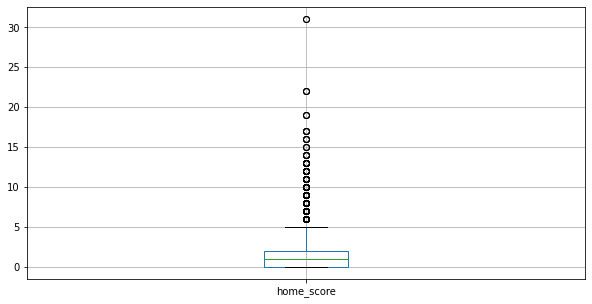

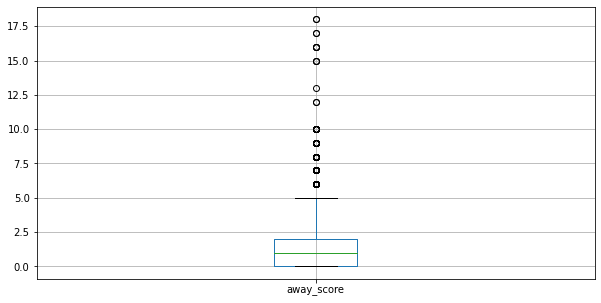

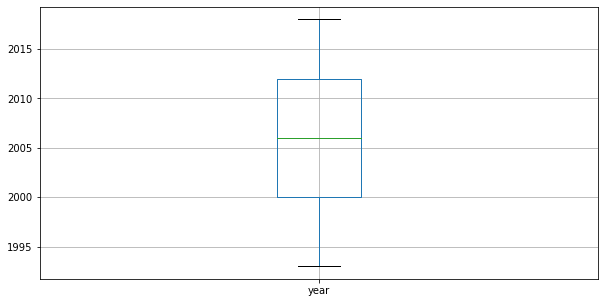

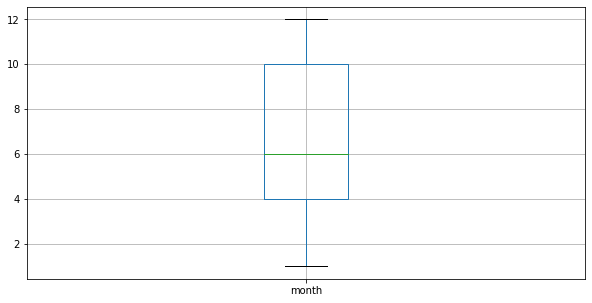

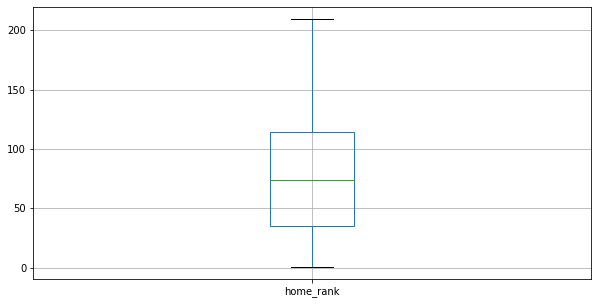

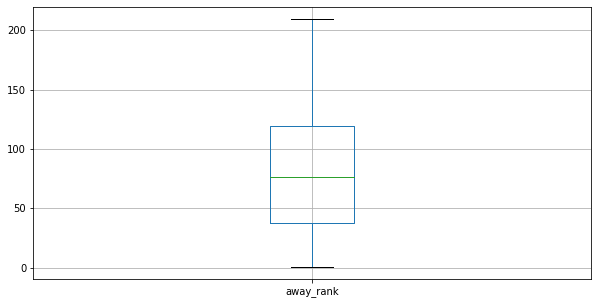

In [21]:
#create a box plot for all columns with numbers 
df_num = football.select_dtypes(include = ['float64','int64']) #create a dataframe with just numbers 
for column in df_num:
    plt.figure(figsize=(10,5))
    df_num.boxplot([column])

There exists outliers in the dataset. Nonetheless,I will not drop them since its not uncommon for a team to score numerous goals in a game. 

Data Completeness

In [22]:
#check for missing values 
football.isnull().sum()

home_team     0
home_score    0
away_team     0
away_score    0
year          0
month         0
home_rank     0
away_rank     0
tournament    0
dtype: int64

Data Consistency

In [24]:
#view any duplicates 
football.duplicated().sum()

 

4828

We have 4828 duplicates. We shall assume them since its possible for two exact teams to have played more than one match during the same year and still had the same outcome for scores.  

**Exploratory Data Analysis**

Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


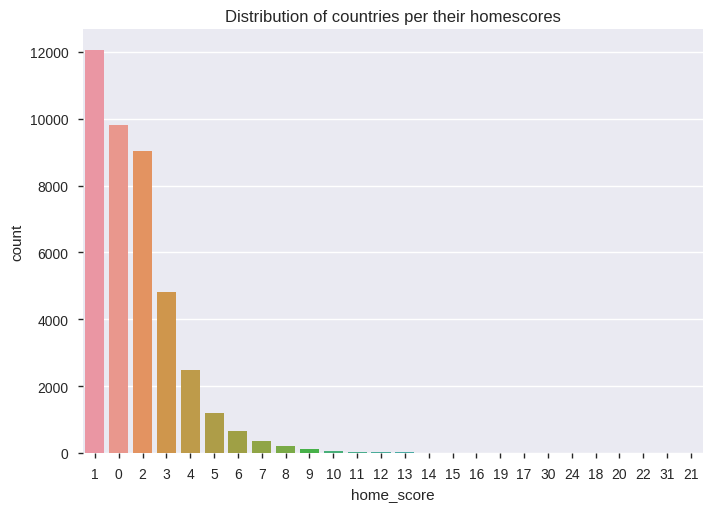

In [28]:
#Histogram of the home scores of different countries
ax = sns.countplot(df1['home_score'], order = df1['home_score'].value_counts().index);
plt.title('Distribution of countries per their homescores');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


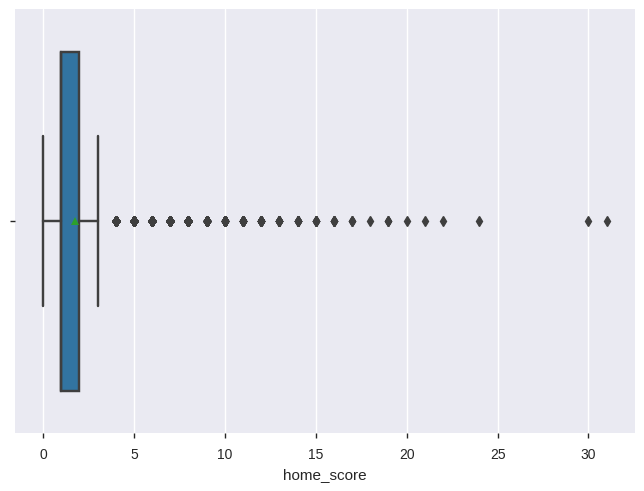

In [29]:
## boxplot
sns.boxplot(df1['home_score'], showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


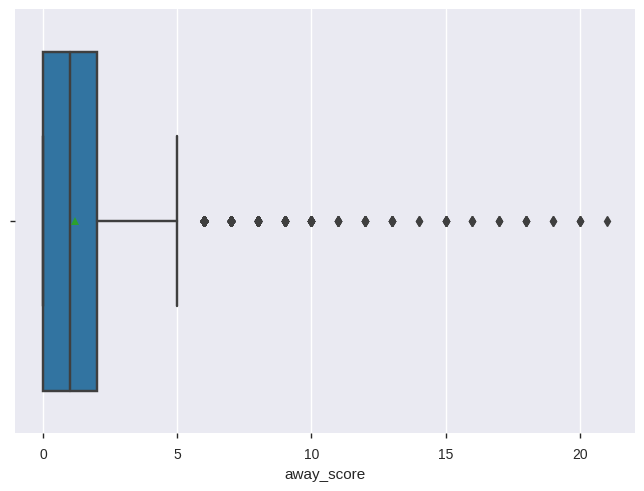

In [30]:
sns.boxplot(df1['away_score'], showmeans=True)

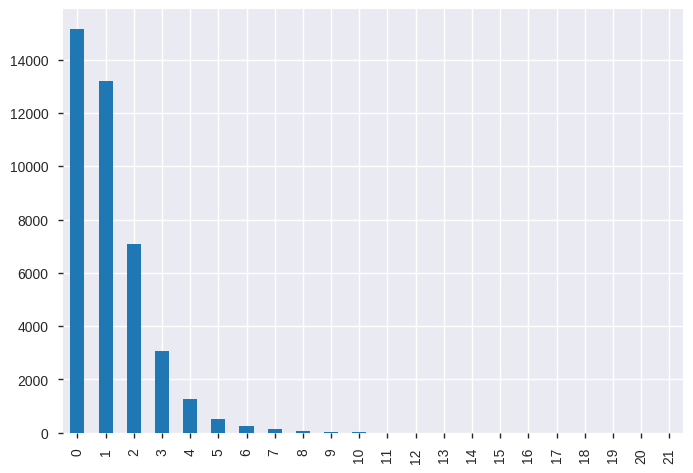

In [31]:
df1['away_score'].value_counts().sort_index().plot.bar()

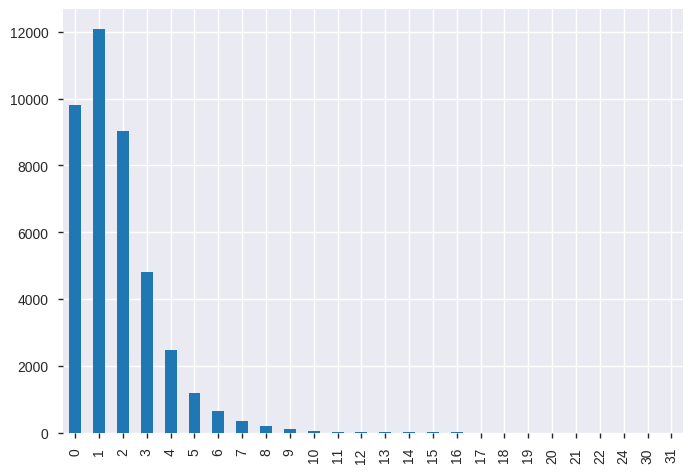

In [32]:
df1['home_score'].value_counts().sort_index().plot.bar()

In [33]:
print(df1.skew())

home_score    2.201504
away_score    2.590589
neutral       1.162415
year         -1.264190
month        -0.095046
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [34]:
print(df1.kurt())

home_score    11.714104
away_score    15.757920
neutral       -0.648822
year           1.478018
month         -1.137069
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [35]:
df1.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month'],
      dtype='object')

In [37]:
df1.shape

(40839, 11)

**Bivariate Analysis**

            home_score  away_score      year     month  home_rank  away_rank
home_score    1.000000   -0.122204 -0.052746  0.019208  -0.115309   0.307034
away_score   -0.122204    1.000000 -0.014701  0.019913   0.136520  -0.139815
year         -0.052746   -0.014701  1.000000 -0.007457   0.092840   0.092347
month         0.019208    0.019913 -0.007457  1.000000   0.068282   0.068660
home_rank    -0.115309    0.136520  0.092840  0.068282   1.000000   0.514813
away_rank     0.307034   -0.139815  0.092347  0.068660   0.514813   1.000000


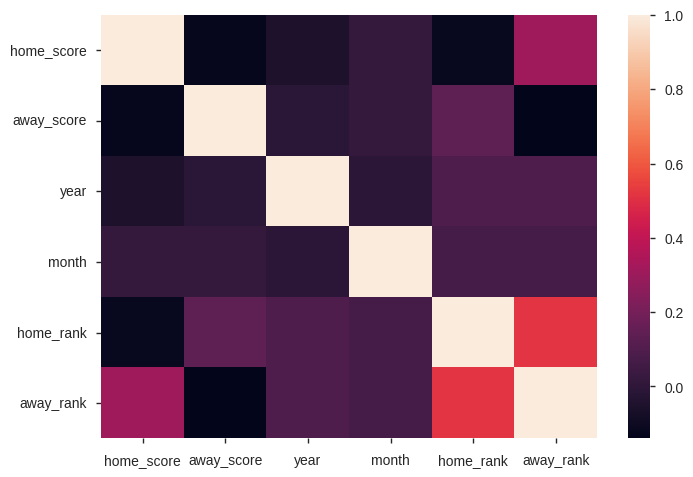

In [41]:
print(football.corr())
sns.heatmap(football.corr())

In [43]:
df1.sample(6)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
36672,2015-01-24,Cameroon,Guinea,1,1,African Cup of Nations,Malabo,Equatorial Guinea,True,2015,1
831,1924-09-21,Uruguay,Argentina,1,1,Friendly,Montevideo,Uruguay,False,1924,9
29170,2007-06-02,Mexico,Iran,4,0,Friendly,San Luis Potosí,Mexico,False,2007,6
4100,1957-03-31,Belgium,Spain,0,5,Friendly,Brussels,Belgium,False,1957,3
16819,1992-02-12,Turkey,Finland,1,1,Friendly,Adana,Turkey,False,1992,2
27224,2004-12-28,Indonesia,Malaysia,1,2,AFF Championship,Jakarta,Indonesia,False,2004,12


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
 9   year        40839 non-null  int64         
 10  month       40839 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(4), object(5)
memory usage: 3.2+ MB


In [45]:
df1['home_score'].corr(df1['away_score'])

-0.1334118196387374

Text(0.5, 1.0, 'home_score vs away_score')

<Figure size 1200x1000 with 0 Axes>

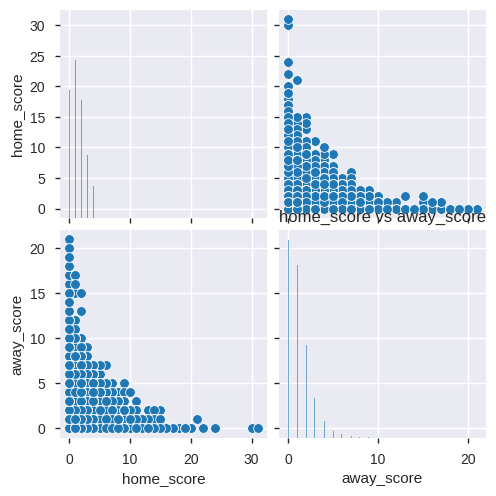

In [46]:
# Determine correlation between numeric features
plt.figure(figsize=(12,10))
sns.pairplot(df1[['home_score','away_score']])
plt.title('home_score vs away_score')

**Multivariate Analysis**

Factor Analysis

In [47]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

#The p vlaue is 0 the observed matrix is not an identity matrix.

/usr/local/lib/python3.7/dist-packages/factor_analyzer/factor_analyzer.py:188: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(nan, nan)

**Principal Component Analysis**

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1[['home_score','away_score']])
scaled_data = scaler.transform(df1[['home_score','away_score']])

In [49]:
scaled_data = pd.DataFrame(scaled_data)

In [50]:
df2 = scaled_data.fillna(0)
df2.head()

,0,1
0,-0.998048,-0.845564
1,1.288812,0.577819
2,0.145382,-0.133872
3,0.145382,0.577819
4,0.717097,-0.845564


In [51]:
from sklearn.decomposition import PCA
logmodel = PCA(n_components=2)
logmodel.fit(df2)
pca_x = logmodel.transform(df2)

In [52]:
pca_x.shape

(40839, 2)

In [53]:
df3 = pd.DataFrame(logmodel.components_, columns = ['home_score','away_score'])

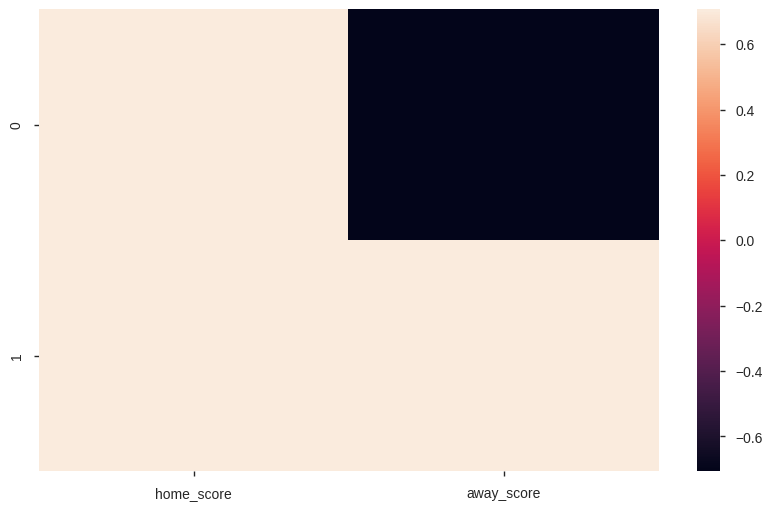

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(df3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'First Principle Component ')

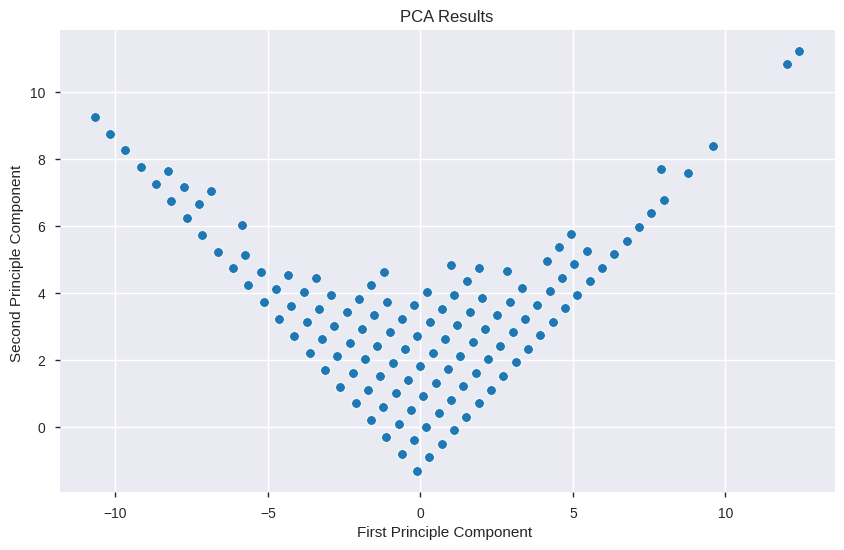

In [55]:
plt.figure(figsize=(10,6))
ty=sns.scatterplot(pca_x[:,0], pca_x[:,1])
sns.despine(left=True)
ty.set_title('PCA Results')
ty.set_ylabel('Second Principle Component ')
ty.set_xlabel('First Principle Component ')

In [56]:
pca_x

array([[-0.10782212, -1.30363053],
       [ 0.50274766,  1.31990765],
       [ 0.19746277,  0.00813856],
       ...,
       [-0.61106422, -0.80038843],
       [-0.61106422, -0.80038843],
       [-0.20680072, -0.39612494]])

**Polynomial Regression Analysis**

In [57]:
#Import libaries
import datetime
import operator
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import Markdown as md
from datetime import date, timedelta, datetime
from numpy import sqrt
from pandas import read_csv, to_datetime
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [58]:
df1.shape

(40839, 11)

In [59]:
df1.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
year                   int64
month                  int64
dtype: object

In [60]:
df5 = df1
df5.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3


In [61]:
df5.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month'],
      dtype='object')

In [63]:
print(df5)

#Get the 2 and the last column from the dataset 
X = df5.iloc[:, 3:4].values
y = df5.iloc[:, 4].values
print(X)
print(y)

            date         home_team        away_team  home_score  away_score  \
0     1872-11-30          Scotland          England           0           0   
1     1873-03-08           England         Scotland           4           2   
2     1874-03-07          Scotland          England           2           1   
3     1875-03-06           England         Scotland           2           2   
4     1876-03-04          Scotland          England           3           0   
...          ...               ...              ...         ...         ...   
40834 2019-07-18    American Samoa           Tahiti           8           1   
40835 2019-07-18              Fiji  Solomon Islands           4           4   
40836 2019-07-19           Senegal          Algeria           0           1   
40837 2019-07-19        Tajikistan      North Korea           0           1   
40838 2019-07-20  Papua New Guinea             Fiji           1           1   

                   tournament       city   country 

In [64]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [65]:
# Fit Linear Regression model to the dataset. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [66]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg2=PolynomialFeatures(degree=2)
X_poly=poly_reg2.fit_transform(X)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression()

In [67]:
poly_reg3=PolynomialFeatures(degree=3)
X_poly3=poly_reg3.fit_transform(X)
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_poly3,y)

LinearRegression()

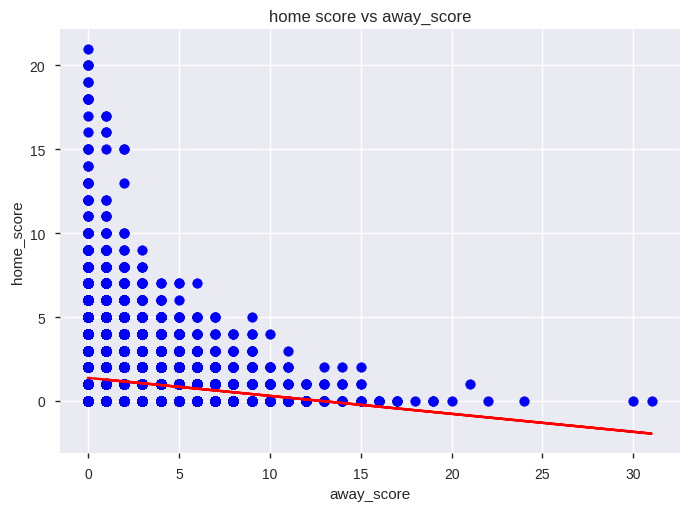

In [68]:
# Visualize the Linear Regression results
plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg.predict(X), color='red')
plt.title('home score vs away_score')
plt.xlabel('away_score')
plt.ylabel('home_score')
plt.show()

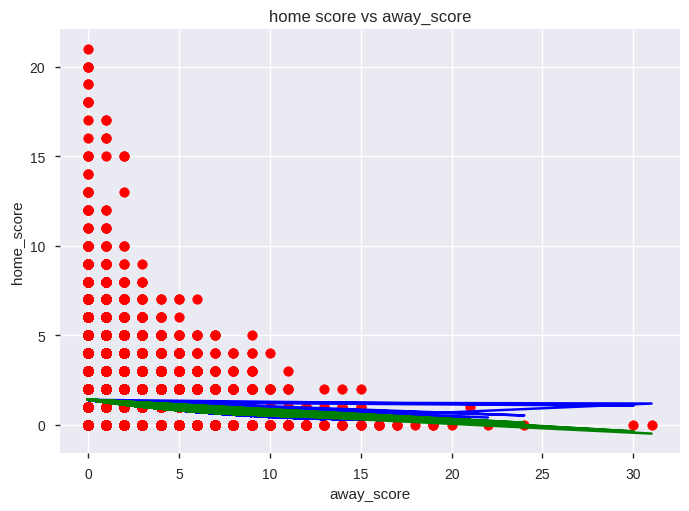

In [69]:
# Visualize the polynomial Regression results
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg2.fit_transform(X)),color='blue')
plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')
plt.title('home score vs away_score')
plt.xlabel('away_score')
plt.ylabel('home_score')
plt.show()

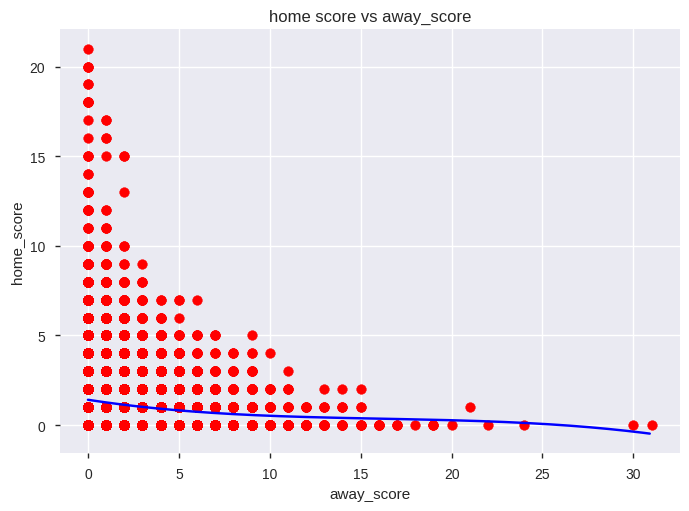

In [70]:
X_grid=np.arange(min(X),max(X),0.1) # This will give us a vector.We will have to convert this into a matrix 
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X_grid,lin_reg_3.predict(poly_reg3.fit_transform(X_grid)),color='blue')
#plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')
plt.title('home score vs away_score')
plt.xlabel('away_score')
plt.ylabel('home_score')
plt.show()

In [71]:
# droppig unnecessary columns
to_drop = ['home_team', 'away_team']
df5.drop(to_drop, axis=1, inplace=True)

In [72]:
# Model 1: Predict how many goals the home team scores.
lin_reg.predict([[6.5]])

array([0.67857698])

In [73]:
# multicolinearity
correlations = df5.corr()
correlations

# the table below shows how the variables relate with each other. 
# there is very minimal correlation between the scores at home and away

,home_score,away_score,neutral,year,month
home_score,1.000000,-0.133412,-0.031660,-0.123567,0.025382
away_score,-0.133412,1.000000,0.084335,-0.133891,0.011370
neutral,-0.031660,0.084335,1.000000,0.107900,-0.056903
year,-0.123567,-0.133891,0.107900,1.000000,0.022584
month,0.025382,0.011370,-0.056903,0.022584,1.000000


In [74]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score,neutral,year,month
home_score,1.040682,0.159218,0.001491,0.150463,-0.031538
away_score,0.159218,1.053393,-0.103880,0.172506,-0.025826
neutral,0.001491,-0.103880,1.025934,-0.125831,0.062364
year,0.150463,0.172506,-0.125831,1.056097,-0.036792
month,-0.031538,-0.025826,0.062364,-0.036792,1.005474
